**This is a notebook for the AICP Internship Task for Instagram reach forecasting is the process of predicting the number of people that an Instagram post, story, or other content will be reached**

Features in the data:   
1.Date   
2.Instagram Reach   

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

**Q.1: Import data and check null values, column info, and descriptive statistics of the data.**

In [64]:
data = pd.read_csv('Instagram-Reach.csv')

In [65]:
data.head()

,Date,Instagram reach
0,2022-04-01T00:00:00,7620
1,2022-04-02T00:00:00,12859
2,2022-04-03T00:00:00,16008
3,2022-04-04T00:00:00,24349
4,2022-04-05T00:00:00,20532


In [66]:
data.tail()

,Date,Instagram reach
360,2023-03-27T00:00:00,15622
361,2023-03-28T00:00:00,18645
362,2023-03-29T00:00:00,41238
363,2023-03-30T00:00:00,50490
364,2023-03-31T00:00:00,22014


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             365 non-null    object
 1   Instagram reach  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [68]:
data.describe()

,Instagram reach
count,365.000000
mean,50474.712329
std,30051.787552
min,7620.000000
25%,25070.000000
50%,43987.000000
75%,68331.000000
max,161998.000000


**Q.2: Convert the Date column into datetime datatype**

In [69]:
data['Date'] = pd.to_datetime(data['Date'])

 **Q.3: Analyze the trend of Instagram reach over time using a line chart**

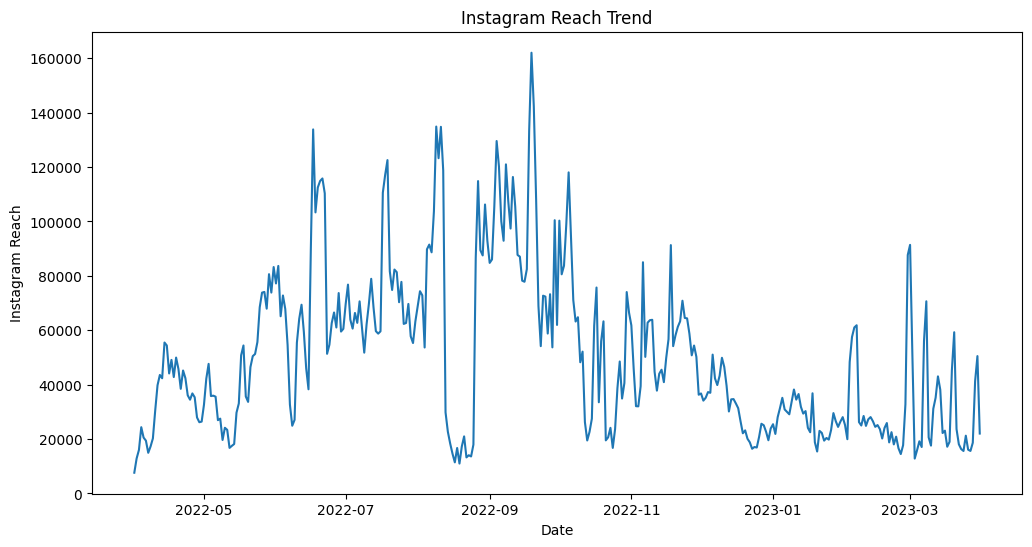

In [70]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Instagram reach'])
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.title('Instagram Reach Trend')
plt.show()

**Q.4: Analyze Instagram reach for each day using a bar chart**

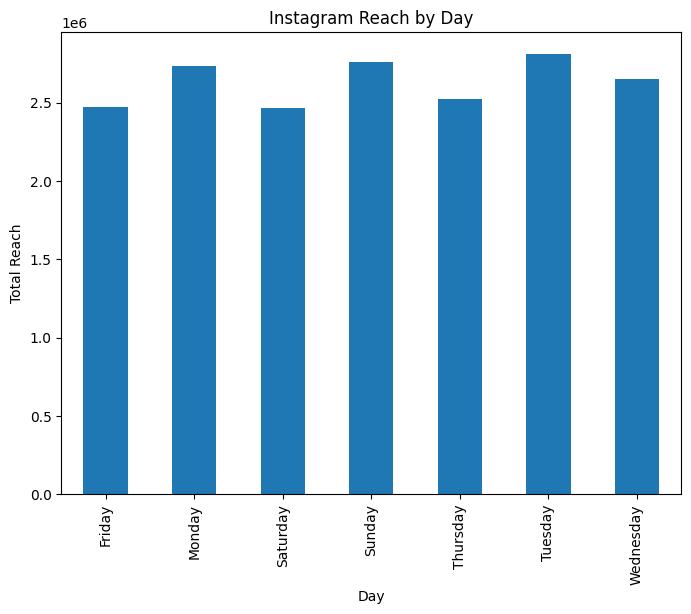

In [71]:
data['Day'] = data['Date'].dt.day_name()
daily_reach = data.groupby('Day')['Instagram reach'].sum()
plt.figure(figsize=(8, 6))
daily_reach.plot(kind='bar')
plt.xlabel('Day')
plt.ylabel('Total Reach')
plt.title('Instagram Reach by Day')
plt.show()

**Q.5: Analyze the distribution of Instagram reach using a box plot**

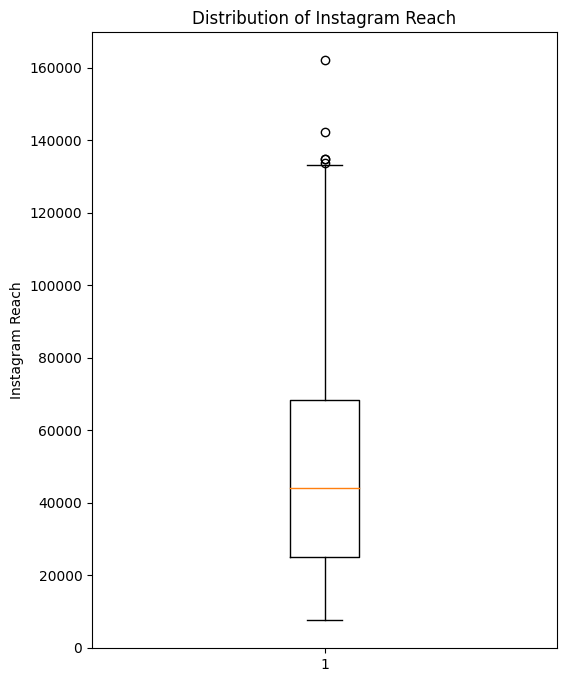

In [72]:
plt.figure(figsize=(6, 8))
plt.boxplot(data['Instagram reach'])
plt.ylabel('Instagram Reach')
plt.title('Distribution of Instagram Reach')
plt.show()

 **Q.6: Analyze the reach based on the days of the week**

In [73]:
daily_stats = data.groupby('Day')['Instagram reach'].agg(['mean', 'median', 'std'])

In [74]:
print(daily_stats)

                   mean   median           std
Day                                           
Friday     46666.849057  35574.0  29856.943036
Monday     52621.692308  46853.0  32296.071347
Saturday   47374.750000  40012.0  27667.043634
Sunday     53114.173077  47797.0  30906.162384
Thursday   48570.923077  39150.0  28623.220625
Tuesday    54030.557692  48786.0  32503.726482
Wednesday  51017.269231  42320.5  29047.869685


**Q.7: Create a bar chart to visualize the reach for each day of the week**

<Figure size 800x600 with 0 Axes>

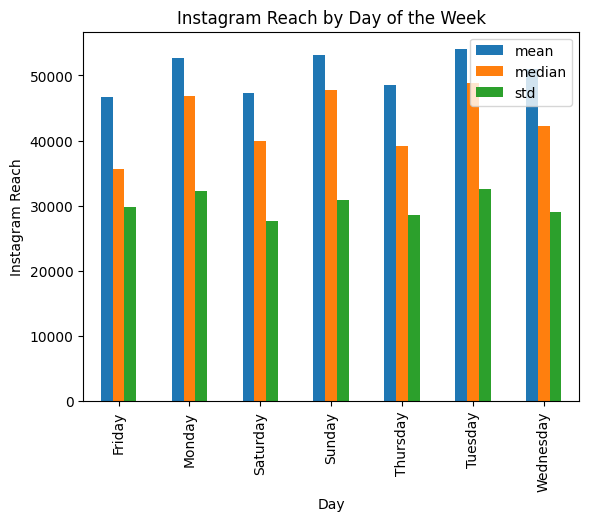

In [75]:
# Create a bar chart to visualize the reach for each day of the week
plt.figure(figsize=(8, 6))
daily_stats.plot(kind='bar')
plt.xlabel('Day')
plt.ylabel('Instagram Reach')
plt.title('Instagram Reach by Day of the Week')
plt.show()

**Q.8: Check the Trends and Seasonal patterns of Instagram reach.**

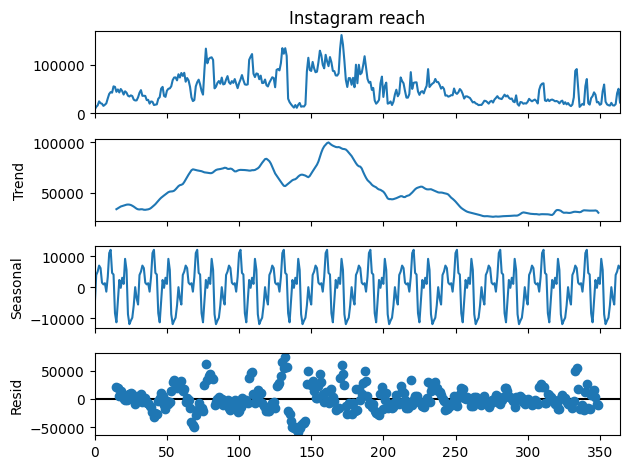

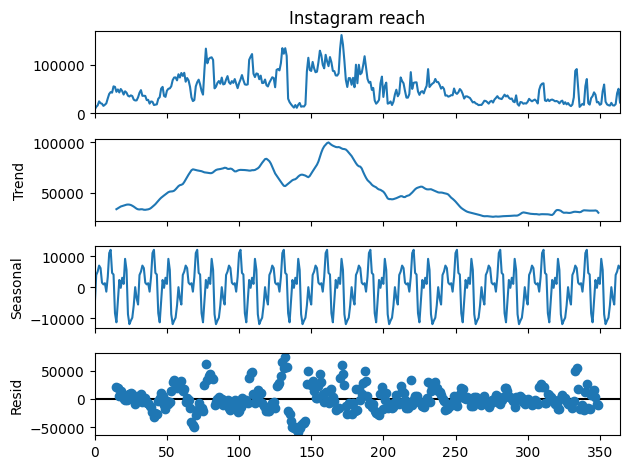

In [76]:
# decompose the data into trend, seasonality and residuals
decompose = seasonal_decompose(data["Instagram reach"], model="additive", period=30)
decompose.plot()

**Q#9 To find p & q value**

In [77]:
from statsmodels.tsa.stattools import acf, pacf
x_acf = pd.DataFrame(acf(data['Instagram reach']))
print(x_acf)

           0
0   1.000000
1   0.854303
2   0.709155
3   0.613198
4   0.547136
5   0.502253
6   0.475229
7   0.434034
8   0.390486
9   0.356621
10  0.336119
11  0.311265
12  0.297760
13  0.276422
14  0.293886
15  0.332642
16  0.330371
17  0.322866
18  0.326725
19  0.326959
20  0.335875
21  0.343102
22  0.336285
23  0.335511
24  0.320678
25  0.297244


In [78]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

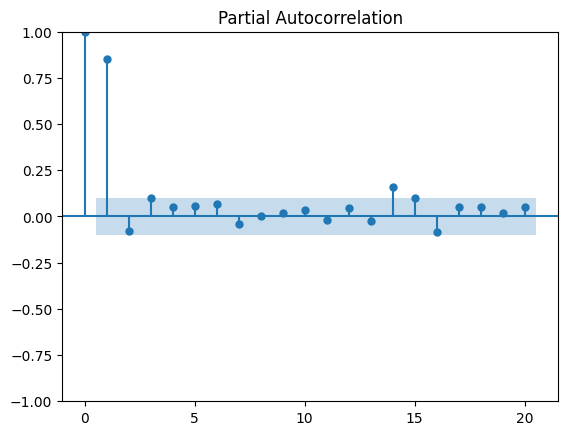

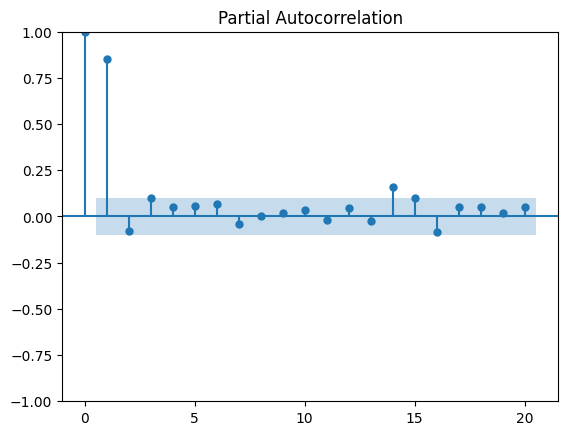

In [79]:
# partial autocorrelation
from statsmodels.tsa.stattools import acf, pacf
plot_pacf(data['Instagram reach'], lags=20, alpha=0.05)

**Q.10: Train a model using SARIMA and make predictions**

In [92]:
import statsmodels.api as sm
import warnings

# SARIMA parameters
p, d, q = 1, 1, 1
P, D, Q, m = 0, 1, 1, 30

# Suppressing warnings
warnings.filterwarnings("ignore")

# Fitting SARIMA model
model = sm.tsa.statespace.SARIMAX(data['Instagram reach'], 
                                  order=(p, d, q), 
                                  seasonal_order=(P, D, Q, m))
model = model.fit()




In [93]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                    Instagram reach   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 30)   Log Likelihood               -3741.066
Date:                            Mon, 13 May 2024   AIC                           7490.133
Time:                                    00:28:43   BIC                           7505.377
Sample:                                         0   HQIC                          7496.211
                                            - 365                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7825      0.076     10.294      0.000       0.634       0.931
ma.L1         -0.9553      0.039   

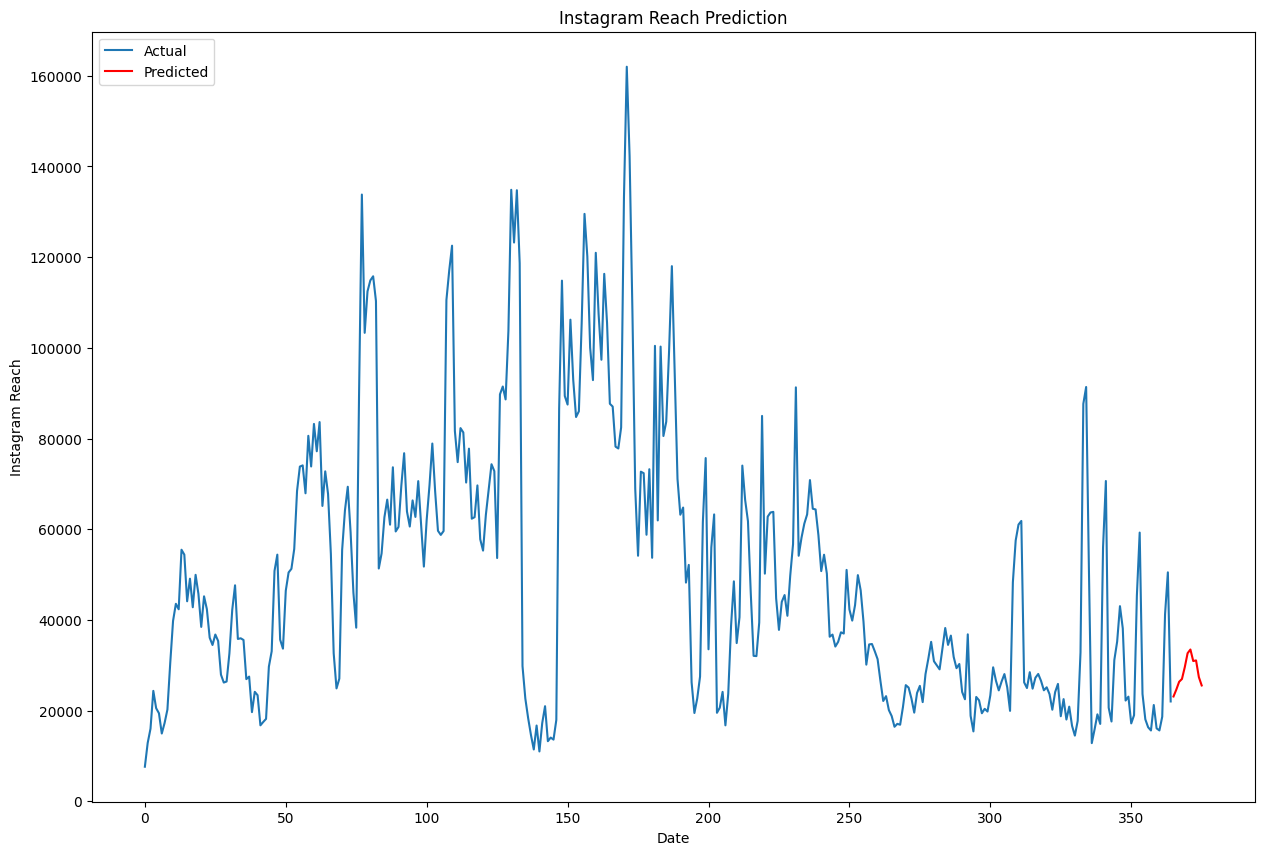

In [96]:
predictions = model.predict(start=len(data['Instagram reach']), end=len(data['Instagram reach'])+10)

# plot the predictions
plt.figure(figsize=(15, 10))
plt.plot(data["Instagram reach"], label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.title('Instagram Reach Prediction')
# change legend location
plt.legend(loc='upper left')
plt.show()